# Binary Classifier

In [1]:
# Importing the MNIST dataset
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [9]:
# Import the data
X, y = mnist['data'],  mnist['target']

Info
- there are 70,000 images
- there are 28x28, so 784 features
- there default shape is an array of 784 elements

In [15]:
# Displaying the images
import matplotlib.pyplot as plt 
import numpy as np

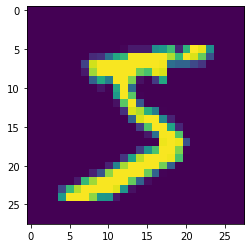

In [14]:
plt.imshow(X[0].reshape(28, 28))

In [16]:
# convert the labels from strings to integers
y = y.astype(np.uint8)

In [17]:
# train, test split
# 60,000 - 10,000 split
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training the binary classifier

- We will simplify the problem for now by only identifying one digit
- Let that digit be 5

In [19]:
# Creating the targets for the binary classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# Choosing a classifier
- We are going to start by training a Stochastic Gradient Descent
- Advantage, it is able to handle large datasets efficiently

In [21]:
from sklearn.linear_model import SGDClassifier

In [24]:
# fitting
sgdc = SGDClassifier(random_state=1)
sgdc.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
# predicting
# note that predict takes an array of samples, not just one sample
sgdc.predict([X_train[0]])

array([ True])

# Evaluating the performance

In [33]:
from sklearn.model_selection import cross_val_score

In [35]:
# cv is how many folds you want to create, in this case 3
# Training on just 1 fold and then testing on the other 3 folds
# Returns the accuracy of all 3 folds
cross_val_score(sgdc, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95785, 0.9667 , 0.9608 ])

In [37]:
# 95% is not as accurate is it may seem at first

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
N5C = Never5Classifier()
cross_val_score(N5C, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

# Confusion Matrix

In [39]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

- Each row in a confusion Matrix repersents an actual class
- Column repersents the predicted class

In [42]:
y_train_pred = cross_val_predict(sgdc, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53603,   976],
       [ 1317,  4104]])

Conclusions
- The first row repersents the negative class (non 5's) and the first col is the corrected classified ones 53604 (true negatives), the next is (false positives) 976
- The second row, first col repersents the non 5's classified as 5's 1317, the next col are the 5's classified correctly


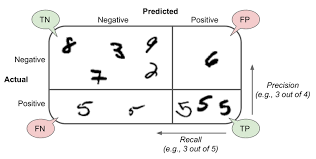

## Precision
    [[54579,    0],  -----> [[TN,  FP]
    [     0, 5421]]          [FN,  TP]]

\begin{equation*}
precision = \frac{TP}{TP+FP}
\end{equation*}

## Recall

\begin{equation*}
recall = \frac{TP}{TP+FN}
\end{equation*}

- precision and recall are opposite function
    - As one increases the other decreases
    - You can't have both recall and precision in a model
    - because if you try to go for a 100% precision your are bound to classify some 5 as non 5's and vise-versa
    
- you are able to choose a threshold between precision and recall
    - view page 90

In [44]:
from sklearn.metrics import precision_score, recall_score

# Prediction and recall scores
ps = precision_score(y_train_5, y_train_pred)
rs = recall_score(y_train_5, y_train_pred)

print('Prediction Score:', ps)
print('Recall Score:', rs)

Prediction Score: 0.8078740157480315
Recall Score: 0.7570558937465413


##  F1 Score
- Merges precision and Recall score into 1 score

\begin{equation*}
    F_{1} = 2 \times \frac{precision \times recall} {precision + recall}
\end{equation*}

In [46]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train_5, y_train_pred)
print('f1 score:', f1)

f1 score: 0.7816398438243977


Now we notice that this once amazing model is not that amazing anymore